# Class Assessment on Linear Regression

# Que-1: Plot a bar chart showing count of individual species?

In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
new = pd.read_csv(r"C:\Users\justw\Downloads\Machine Learning with Python\Linear Regression\Class Assessment\Fish_dataset.csv")

new

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:ylabel='Count'>

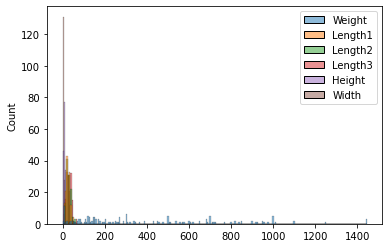

In [59]:
sns.histplot(data=new)

In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<AxesSubplot:>

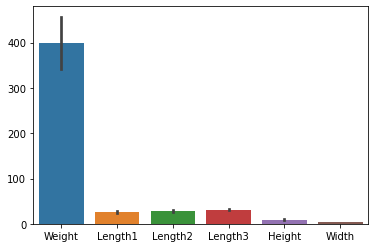

In [5]:
sns.barplot(data=new)

# Que-2: Identify outliers and remove if any?

<AxesSubplot:>

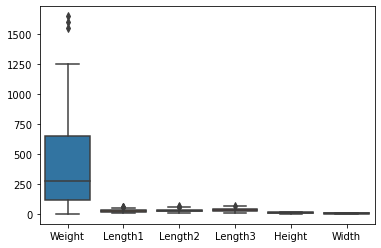

In [6]:
sns.boxplot(data=new)

<AxesSubplot:ylabel='Weight'>

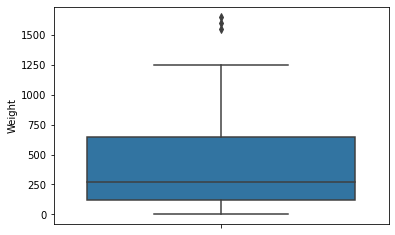

In [8]:
sns.boxplot(y='Weight',data=new)

<AxesSubplot:ylabel='Length1'>

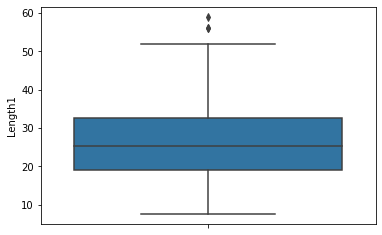

In [9]:
sns.boxplot(y='Length1',data=new)

<AxesSubplot:ylabel='Length2'>

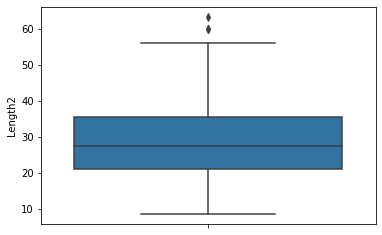

In [10]:
sns.boxplot(y='Length2',data=new)

<AxesSubplot:ylabel='Length3'>

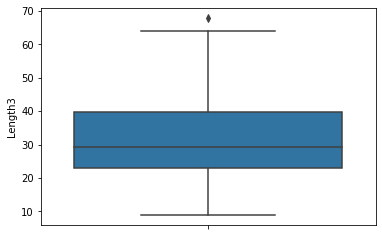

In [11]:
sns.boxplot(y='Length3',data=new)

<AxesSubplot:ylabel='Height'>

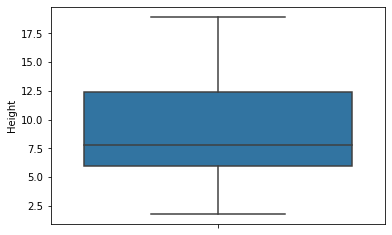

In [12]:
sns.boxplot(y='Height',data=new)

<AxesSubplot:ylabel='Width'>

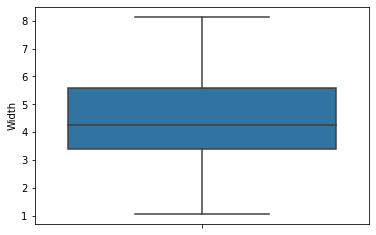

In [13]:
sns.boxplot(y='Width',data=new)

#  Winsorizing Technique -- Treatment of Outlier

In [16]:
q1 = new['Weight'].quantile(0.25)
q3 = new['Weight'].quantile(0.75)
iqr = q3-q1 
upper_limit = q3+1.5*iqr 
upper_limit

1445.0

In [18]:
new['Weight']=np.where(new['Weight'] > upper_limit,upper_limit,new['Weight'])

In [19]:
q1 = new['Length1'].quantile(0.25)
q3 = new['Length1'].quantile(0.75)
iqr = q3-q1 
upper_limit = q3+1.5*iqr 
upper_limit

53.175000000000004

In [20]:
new['Length1']=np.where(new['Length1'] > upper_limit,upper_limit,new['Length1'])

In [21]:
q1 = new['Length2'].quantile(0.25)
q3 = new['Length2'].quantile(0.75)
iqr = q3-q1 
upper_limit = q3+1.5*iqr 
upper_limit

57.25

In [22]:
new['Length2']=np.where(new['Length2'] > upper_limit,upper_limit,new['Length2'])

In [23]:
q1 = new['Length3'].quantile(0.25)
q3 = new['Length3'].quantile(0.75)
iqr = q3-q1 
upper_limit = q3+1.5*iqr 
upper_limit

64.40000000000002

In [24]:
new['Length3']=np.where(new['Length3'] > upper_limit,upper_limit,new['Length3'])

<AxesSubplot:>

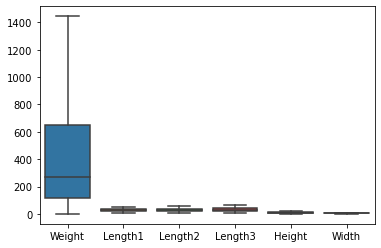

In [25]:
sns.boxplot(data=new)

In [26]:
new.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,395.401887,26.175000,28.342453,31.204403,8.970994,4.417486
std,348.555952,9.782457,10.499859,11.541386,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1445.000000,53.175000,57.250000,64.400000,18.957000,8.142000


In [27]:
new.isna().sum() 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Que-3: Build a regression model and print regression equation?

In [29]:
new.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [58]:
X = new.drop('Weight', axis= 1)

# Putting response variable to y
y = new[['Weight']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [57]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,Weight,Length1,Length2,Length3,Height,Width
3,363.0,26.3,29.0,33.5,12.7300,4.4555
113,700.0,34.0,36.0,38.3,10.6091,6.7408
85,130.0,19.3,21.3,22.8,6.3840,3.5340
155,13.4,11.7,12.4,13.5,2.4300,1.2690
76,70.0,15.7,17.4,18.5,4.5880,2.9415


In [46]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.908177,0.910381,0.917800,0.725061,0.883249
Length1,0.908177,1.000000,0.999499,0.992873,0.645435,0.870861
Length2,0.910381,0.999499,1.000000,0.994657,0.659073,0.876785
Length3,0.917800,0.992873,0.994657,1.000000,0.708358,0.875092
Height,0.725061,0.645435,0.659073,0.708358,1.000000,0.801379
Width,0.883249,0.870861,0.876785,0.875092,0.801379,1.000000


<AxesSubplot:>

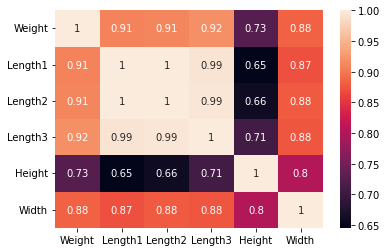

In [47]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Weight vs Length1'}, xlabel='Length1', ylabel='Weight'>

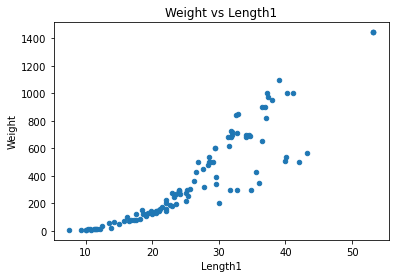

In [48]:
df.plot.scatter(x='Length1', y='Weight', title='Weight vs Length1')

In [49]:
X1=df.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    11053.803994
Length2    14067.147068
Length3     2213.639114
Height        47.526806
Width         84.824206
dtype: float64

In [65]:
X1=df.drop(['Weight','Length2','Length3','Width'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    8.599281
Height     8.599281
dtype: float64

In [66]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~ Length1+Height',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     325.9
Date:                Fri, 04 Nov 2022   Prob (F-statistic):           1.77e-46
Time:                        14:22:30   Log-Likelihood:                -695.92
No. Observations:                 111   AIC:                             1398.
Df Residuals:                     108   BIC:                             1406.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -459.8684     34.854    -13.194      0.000    -528.956    -390.781
Length1       26.0360      1.639     15.885      0.000      22.787      29.285
Height        19.0743      3.806      5.012      0.000      11.531      26.618
==============================================================================
Omnibus:                        4.074   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.524
Skew:                           0.419   Prob(JB):                        0.172
Kurtosis:                       3.241   Cond. No.                         82.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Que-4: What is the mean score of the model at 95% confidence interval?

# Que-5: Compare real and predicted weights and give a conclusion statement based on it?
